# Load libraries

In [14]:
import pandas as pd
#from sklearn.cross_validation import KFold,StratifiedKFold
#import datetime
import numpy as np
#from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
#from sklearn import metrics
#from sklearn.metrics import roc_auc_score
#from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn import metrics
from sklearn.cross_validation import StratifiedKFold
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

#import seaborn as sns
#import pickle
#from sklearn import metrics
#import sys

import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

%matplotlib inline

#  
# Load data

In [3]:
df = pd.read_csv('../../data/cs-training.csv')

In [4]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df.rename(columns={df.columns[0]:'id'}, inplace=True)

In [6]:
df.head()

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
len(df)

150000

In [8]:
df.mean(axis=0)

id                                      75000.500000
SeriousDlqin2yrs                            0.066840
RevolvingUtilizationOfUnsecuredLines        6.048438
age                                        52.295207
NumberOfTime30-59DaysPastDueNotWorse        0.421033
DebtRatio                                 353.005076
MonthlyIncome                            6670.221237
NumberOfOpenCreditLinesAndLoans             8.452760
NumberOfTimes90DaysLate                     0.265973
NumberRealEstateLoansOrLines                1.018240
NumberOfTime60-89DaysPastDueNotWorse        0.240387
NumberOfDependents                          0.757222
dtype: float64

In [9]:
df.rename(columns={'SeriousDlqin2yrs':'target'}, inplace=True)

features = [c for c in df.columns if c not in ['id','target']]

#  
# Analyse NANs

In [10]:
for c in df.columns:
    nan_count = len(df[df[c].isnull()])
    if nan_count>0:
        print(c, nan_count, 1.0*nan_count/len(df))

MonthlyIncome 29731 0.19820666666666667
NumberOfDependents 3924 0.02616


### MonthlyIncome

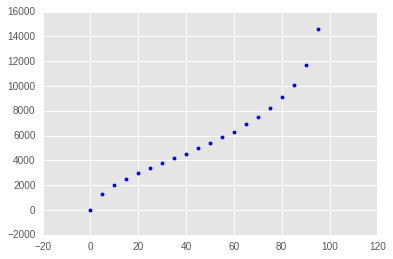

In [11]:
for perc in np.arange(0,100,5):
    plt.scatter(perc, 
                np.percentile(df[~df['MonthlyIncome'].isnull()]['MonthlyIncome'], perc))

In [12]:
#fillna(-1) because there is the other column with a few null values
df_train = df[~df['MonthlyIncome'].isnull()].fillna(-1)
df_toPredict = df[df['MonthlyIncome'].isnull()].fillna(-1) 

print(len(df_train),len(df_toPredict))

120269 29731


In [13]:
features_for_MonthlyIncome = [f for f in features if f!='MonthlyIncome']
print(features_for_MonthlyIncome)

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [ ]:
# TODO: run with normalization (it seems very slow!)
for model in [#SVR(),
              Lasso(alpha=0.1,normalize=True),
              Lasso(alpha=1,normalize=True),
              Lasso(alpha=10,normalize=True),
              Lasso(alpha=100,normalize=True),
              Ridge(alpha=0.1,normalize=True),
              Ridge(alpha=1,normalize=True),
              Ridge(alpha=10,normalize=True),
              Ridge(alpha=100,normalize=True),
              ElasticNet(alpha=0.1,normalize=True),
              ElasticNet(alpha=1,normalize=True),
              ElasticNet(alpha=10,normalize=True),
              ElasticNet(alpha=100,normalize=True),
              BayesianRidge(normalize=True),
              RandomForestRegressor(n_estimators=50),
              RandomForestRegressor(n_estimators=100),
              RandomForestRegressor(n_estimators=150)           
             ]:
    print(str(model))

    errors = cross_val_score(model, 
                            df_train[features_for_MonthlyIncome],
                            df_train['MonthlyIncome'], 
                            cv=5, 
                            scoring='mean_absolute_error')
    print(np.mean(errors),np.std(errors))
    print("")


In [46]:
rf_null_MonthlyIncome = RandomForestRegressor(n_estimators=100)

In [47]:
rf_null_MonthlyIncome.fit(df_train[features_for_MonthlyIncome],
                          df_train['MonthlyIncome'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [48]:
df.loc[df_toPredict.index,'MonthlyIncome'] = rf_null_MonthlyIncome.predict(df_toPredict[features_for_MonthlyIncome])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
len(df[df['MonthlyIncome'].isnull()])

### NumberOfDependents

In [24]:
#fillna(-1) because there is the other column with a few null values
df_train = df[~df['NumberOfDependents'].isnull()]
df_toPredict = df[df['NumberOfDependents'].isnull()]

print(len(df_train),len(df_toPredict))

146076 3924


In [25]:
features_for_NumberOfDependents = [f for f in features if f!='NumberOfDependents']

In [ ]:
rf_null_NumberOfDependents = RandomForestRegressor(n_estimators=100)

In [ ]:
rf_null_NumberOfDependents.fit(df_train[features_for_NumberOfDependents],
                               df_train['NumberOfDependents'])

In [36]:
df.loc[df_toPredict.index,'NumberOfDependents'] = rf_rg.predict(df_toPredict[features_for_NumberOfDependents])

In [37]:
len(df[df['NumberOfDependents'].isnull()])

0

#  
# Functions

In [38]:
def getAuc(y, pred):
    fpr, tpr, thresholds = metrics.roc_curve(y, pred)
    return metrics.auc(fpr, tpr)

In [39]:
def getResultsWithCV(dataframe, 
                     clf, 
                     target_column, 
                     features, 
                     folds=5, 
                     balance_classes=False, 
                     balancing_factor=3):

    kf = StratifiedKFold(y=dataframe[target_column], 
                           n_folds=folds, 
                           shuffle=True,
                           random_state=42)
    
    if list(dataframe.index.values) != list(range(len(dataframe))):
        print("ERROR WITH INDEX")
        return 0
  
    AUCs = [] 
    for train_index, test_index in kf:
         
        # Train the model
        dataframe_train = dataframe.iloc[train_index]
        if balance_classes==True:
            class_1_samples = len(dataframe_train[dataframe_train[target_column]==1])
            dataframe_train = pd.concat([dataframe_train[dataframe_train[target_column]==0].sample(n=class_1_samples*balancing_factor),
                                         dataframe_train[dataframe_train[target_column]==1]])     
        X_train = dataframe_train[features].values
        y_train = dataframe_train[target_column].values     
        clf.fit(X_train, y_train)
               
        # Calculate the predictions
        dataframe_test = dataframe.iloc[test_index]
        X_test = dataframe_test[features].values
        y_test = dataframe_test[target_column].values   
        
        
        predictions_proba = clf.predict_proba(X_test)[:,1]
        dataframe.loc[test_index, 'prediction_proba'] = predictions_proba
      
        fold_auc = getAuc(y_test,predictions_proba)
        AUCs.append(fold_auc)

        print( round(fold_auc,4))
    print( (round(np.mean(AUCs),4), round(np.std(AUCs),5)))

#  
# Run the model

In [40]:
rf = RandomForestClassifier(n_estimators=100)

In [41]:
df.head()

,id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [42]:
getResultsWithCV(dataframe=df, 
                 clf=rf, 
                 target_column='target', 
                 features=features, 
                 folds=5, 
                 balance_classes=False, 
                 balancing_factor=-1)

0.8349
0.8435
0.8394
0.8387
0.8403
(0.83940000000000003, 0.0027699999999999999)


# Train model

In [43]:
rf.fit(df[features],df['target'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# Generate solution

In [44]:
df_toPredict = pd.read_csv('../../data/cs-test.csv')

In [45]:
df_toPredict.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [78]:
df_toPredict = df_toPredict.fillna(-1)

In [80]:
#Id,Probability
df_toPredict['Probability'] = rf.predict_proba(df_toPredict[features])[:,1]

In [81]:
df_toPredict.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Probability
0,1,-1.0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,0.02
1,2,-1.0,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,0.03
2,3,-1.0,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,0.01
3,4,-1.0,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0,0.02
4,5,-1.0,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,0.28


In [82]:
df_toPredict.rename(inplace=True, columns={df_toPredict.columns[0]:'Id'})

In [84]:
df_toPredict[['Id','Probability']].to_csv('predictions.csv',index=False)